<a href="https://colab.research.google.com/github/Ehizson/HDSC-W2023-ExtraProjects/blob/main/Power.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Household Electric Power Consumption**

**Objective**

The dataset contains measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 1 year.
Given the dataset, determine the rate of power consumption in the houusehold
* Weekly
* Monthly
* Sub Metering

In [37]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
#loading dataset
#merge two columns['Date' , 'Time'] into one['dt']

df = pd.read_csv('/content/household_power_consumption.txt', sep=';',
                  parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'],index_col='dt')

# **Data Preparation**

In [39]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [40]:
df.shape

(522245, 7)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 522245 entries, 2006-12-16 17:24:00 to 2007-12-14 09:28:00
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Global_active_power    518310 non-null  float64
 1   Global_reactive_power  518310 non-null  float64
 2   Voltage                518310 non-null  float64
 3   Global_intensity       518310 non-null  float64
 4   Sub_metering_1         518310 non-null  float64
 5   Sub_metering_2         518310 non-null  float64
 6   Sub_metering_3         518310 non-null  float64
dtypes: float64(7)
memory usage: 31.9 MB


In [42]:
df.isnull().sum()

Global_active_power      3935
Global_reactive_power    3935
Voltage                  3935
Global_intensity         3935
Sub_metering_1           3935
Sub_metering_2           3935
Sub_metering_3           3935
dtype: int64

In [43]:
df.isnull().sum().sum()

27545

In [44]:
#using forward-fill

df.ffill(axis=0,inplace=True)

In [45]:
#checking if all null is filled

df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

# **Data Transformation**

**Analysis**

1. Weekly
2. Monthly

**Sub Datasets**

1. Power Consumption
2. Sub Metering

In [47]:
#creating two columns from index
#to ease data visualization

df['Date'] = df.index.date
df['time'] = df.index.time

In [48]:
#Converting Date dtype form object to datetime

df['Date'] = pd.to_datetime(df['Date'])

In [49]:
#Checking the dtypes of all columns

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 522245 entries, 2006-12-16 17:24:00 to 2007-12-14 09:28:00
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Global_active_power    522245 non-null  float64       
 1   Global_reactive_power  522245 non-null  float64       
 2   Voltage                522245 non-null  float64       
 3   Global_intensity       522245 non-null  float64       
 4   Sub_metering_1         522245 non-null  float64       
 5   Sub_metering_2         522245 non-null  float64       
 6   Sub_metering_3         522245 non-null  float64       
 7   power_consumption      522245 non-null  float64       
 8   Date                   522245 non-null  datetime64[ns]
 9   time                   522245 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 43.8+ MB


**From 2006-12-16 to 2006-12-31 > 16 Days**

**From 2007-01-01 to 2007-12-14 > 348 Days**

**Total Days: 364 days**

**Sub Datasets**

In [50]:
#Grouping the entire data by Date

df_data = df.groupby(['Date']).sum()
df_data.head()

<ipython-input-50-751bcaf255df>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_data = df.groupby(['Date']).sum()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
Date,,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933333
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.666667
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433333
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900000
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800000


In [51]:
df_data.shape

(364, 8)

**Sub Dataframe**

* **Power Consumption**

It represents the active energy consumed every day (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3

In [52]:
#creating sub-df for power consumption

df_power_consumption = df_data[['power_consumption']]
df_power_consumption.head()

,power_consumption
Date,
2006-12-16,14680.933333
2006-12-17,36946.666667
2006-12-18,19028.433333
2006-12-19,13131.900000
2006-12-20,20384.800000


* **Sub Metering**

**sub_metering_1:** It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

**sub_metering_2:** It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

**sub_metering_3:** It corresponds to an electric water-heater and an air-conditioner.

In [53]:
#creating sub-df for sub metering

df_sub_meterings = df_data[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
df_sub_meterings.head()

,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,
2006-12-16,0.0,546.0,4926.0
2006-12-17,2033.0,4187.0,13341.0
2006-12-18,1063.0,2621.0,14018.0
2006-12-19,839.0,7602.0,6197.0
2006-12-20,0.0,2648.0,14063.0


* **Global(active_power, reactive_power, intensity)**

In [54]:
#Creating sub-df of Global_active_power, Global_reactive_power, and Global_intensity 

df_global = df_data[['Global_active_power','Global_reactive_power','Global_intensity']]
df_global.head()

,Global_active_power,Global_reactive_power,Global_intensity
Date,,,
2006-12-16,1209.176,34.922,5180.8
2006-12-17,3390.460,226.006,14398.6
2006-12-18,2203.826,161.792,9247.2
2006-12-19,1666.194,150.942,7094.0
2006-12-20,2225.748,160.998,9313.0


# **Exploratory Data Analysis**

### **Power Consumption Analysis**

In [55]:
#Statistical summary of power consumption monthly

df_power_consumption.groupby([df_power_consumption.index.year, df_power_consumption.index.month]).describe()

power_consumption                                            \
                      count          mean           std           min   
Date Date                                                               
2006 12                16.0  28614.402083  14467.098188  13131.900000   
2007 1                 31.0  22095.779570   7651.602633  11791.900000   
     2                 28.0  19967.391667  10767.107725   6313.733333   
     3                 31.0  16940.351613   7616.233888   6285.800000   
     4                 30.0  11562.945556   3835.743655   6602.766667   
     5                 31.0  11489.167742   2901.986029   6703.633333   
     6                 30.0   9227.982222   2627.347956   4771.433333   
     7                 31.0   7854.232258   1739.869239   4063.933333   
     8                 31.0   8288.466667   2042.530447   3969.333333   
     9                 30.0  11448.963333   2518.599821   7675.566667   
     10                31.0  14003.981720   3508.039090   6072.466667   
     11                30.0  16927.945556   4477.778764   5986.266667   
     12                14.0  19806.559524   5588.737449   4990.666667   

                                                                   
                    25%           50%           75%           max  
Date Date                                                          
2006 12    18603.808333  23746.466667  35609.316667  61736.433333  
2007 1     16579.283333  18816.733333  30133.633333  39584.733333  
     2     14415.900000  17145.700000  23812.516667  40009.033333  
     3     12886.000000  15914.133333  17830.033333  40280.600000  
     4      8984.700000  11045.816667  13054.116667  22783.600000  
     5      9697.766667  11449.133333  12171.016667  20776.066667  
     6      7673.608333   8455.750000  10223.841667  14734.366667  
     7      6499.416667   8179.700000   9167.766667  10998.900000  
     8      6933.033333   7778.900000   9738.333333  13079.333333  
     9      9757.508333  10730.916667  12828.800000  18543.366667  
     10    12438.283333  14417.666667  16300.183333  19602.633333  
     11    15954.725000  17434.033333  19374.391667  25758.666667  
     12    17889.650000  20231.483333  22245.633333  29462.133333

We will visualize the power consumption coulumn using bar chart

Four types of aggregation (Sum, Max, Min, Mean) each for Weekly and Monthly Analysis.

<Axes: title={'center': 'Monthly - Total watt-hour for Power Consumption'}, xlabel='Month', ylabel='Readings in watt-hour'>

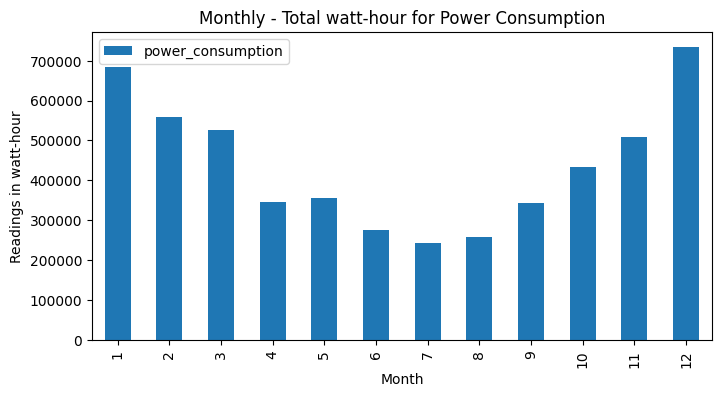

In [56]:
#Monthly - Total watt-hour for Power Consumption

df_power_consumption.groupby(df_power_consumption.index.month).sum().plot(kind="bar",xlabel='Month',ylabel='Readings in watt-hour',title="Monthly - Total watt-hour for Power Consumption", figsize=(8,4))

<Axes: title={'center': 'Monthly - Maximum watt-hour for Power Consumption'}, xlabel='Month', ylabel='Readings in watt-hour'>

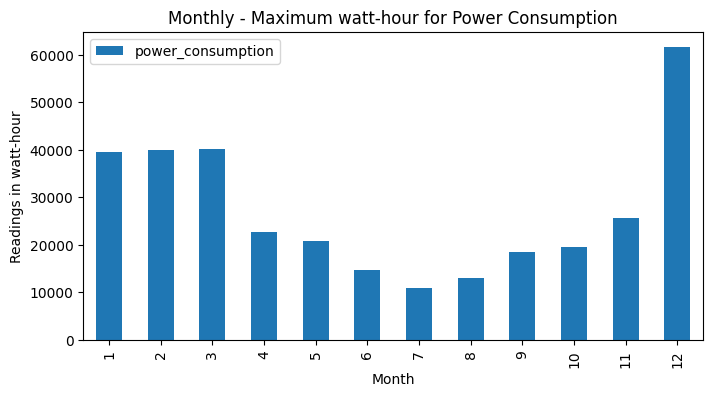

In [57]:
#Monthly - Maximum watt-hour for Power Consumption

df_power_consumption.groupby(df_power_consumption.index.month).max().plot(kind="bar",xlabel='Month',ylabel='Readings in watt-hour',title="Monthly - Maximum watt-hour for Power Consumption", figsize=(8,4))

<Axes: title={'center': 'Monthly - Minimum watt-hour for Power Consumption'}, xlabel='Month', ylabel='Readings in watt-hour'>

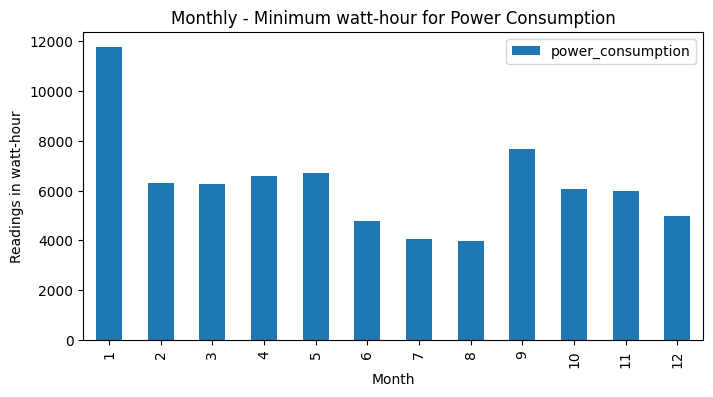

In [58]:
#Monthly - Minimum watt-hour for Power Consumption

df_power_consumption.groupby(df_power_consumption.index.month).min().plot(kind="bar",xlabel='Month',ylabel='Readings in watt-hour',title="Monthly - Minimum watt-hour for Power Consumption", figsize=(8,4))

<Axes: title={'center': 'Monthly - Average watt-hour for Power Consumption'}, xlabel='Month', ylabel='Readings in watt-hour'>

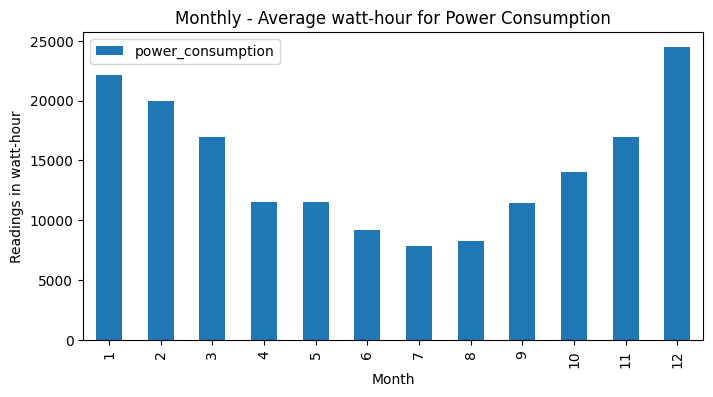

In [59]:
#Monthly - Average watt-hour for Power Consumption

df_power_consumption.groupby(df_power_consumption.index.month).mean().plot(kind="bar",xlabel='Month',ylabel='Readings in watt-hour',title="Monthly - Average watt-hour for Power Consumption", figsize=(8,4))

**Observation for Monthly Power Consumption(watt hour)**

Total power consumption ranges around ~ 700 KWH

Minumum power consumption is done in August around ~ 3-4 KWH

Maximum power consumption is done in December around ~ 60 KWH

Avearge power consumption for all 12 months, range around ~ 7.5-30 KWH

We observe that more power is consumed during December and less power is consumed during August.

In [60]:
#Statistical summary of power consumption weekly

df_power_consumption.groupby(df_power_consumption.index.isocalendar().week).describe()

power_consumption                                            \
                 count          mean           std           min   
week                                                               
1                  7.0  24528.876190  11670.475086  11791.900000   
2                  7.0  21982.609524   6608.730791  15405.900000   
3                  7.0  21486.538095   6411.254669  15069.000000   
4                  7.0  22349.776190   7311.736952  13946.733333   
5                  7.0  23118.457143  10738.362607  15711.666667   
6                  7.0  20965.014286   8814.990002  14188.300000   
7                  7.0  21293.561905   7518.444356  14491.766667   
8                  7.0  19272.114286  12944.609789   6373.333333   
9                  7.0   7950.200000   3338.017812   6285.800000   
10                 7.0  19333.357143   9757.678285  11141.200000   
11                 7.0  16756.000000   2846.020091  10970.400000   
12                 7.0  19653.714286   8986.601777  11543.800000   
13                 7.0  16467.004762   6398.333519  11703.000000   
14                 7.0  15629.200000   3422.112446  12053.666667   
15                 7.0   7781.061905   1342.738886   6602.766667   
16                 7.0  11378.852381   3845.114816   8781.666667   
17                 7.0  10745.361905   1125.163440   8869.666667   
18                 7.0  11940.323810   4515.693909   6703.633333   
19                 7.0  10602.604762   2518.791519   7057.066667   
20                 7.0  12164.271429   2917.831951   9347.200000   
21                 7.0  11261.652381   2168.580994   9139.700000   
22                 7.0  11583.252381   1598.049577   9275.900000   
23                 7.0  10626.480952   1442.211198   8239.633333   
24                 7.0   9761.361905   3509.350947   5666.400000   
25                 7.0   6718.147619   1467.057831   4771.433333   
26                 7.0   8909.509524   1289.794510   7448.033333   
27                 7.0   8032.700000   1341.096546   6373.200000   
28                 7.0   8201.590476   1580.716589   5093.200000   
29                 7.0   7827.580952   1182.669008   6397.100000   
30                 7.0   7484.700000   2526.110661   4063.933333   
31                 7.0   7431.457143   1832.642433   5252.266667   
32                 7.0   8153.252381   2679.923258   5765.166667   
33                 7.0   7525.200000   1701.238917   3969.333333   
34                 7.0   9001.019048   2101.292607   6934.033333   
35                 7.0  10476.571429   3298.147639   6015.533333   
36                 7.0   9641.528571   1424.679818   7675.566667   
37                 7.0  10937.809524   1014.188762   9107.866667   
38                 7.0  10081.295238   1020.476731   8455.333333   
39                 7.0  14230.509524   2756.069009   9756.500000   
40                 7.0  13662.104762   1231.567710  11645.900000   
41                 7.0  15349.623810   2603.936253  12124.533333   
42                 7.0  14895.347619   2523.054864  11786.766667   
43                 7.0  15086.257143   4234.987969   6487.966667   
44                 7.0   7829.714286   2594.645688   5986.266667   
45                 7.0  19048.519048   3517.880474  16239.100000   
46                 7.0  19007.885714   3063.985380  15186.466667   
47                 7.0  17136.547619   3003.218742  12495.900000   
48                 7.0  20286.423810   4952.915744  15859.933333   
49                 7.0  20149.509524   3190.442310  15051.600000   
50                 7.0  19102.528571   9518.604183   4990.666667   
51                 7.0  25900.800000  16742.758189  13131.900000   
52                 7.0  32128.176190  13266.463616  18189.333333   

                                                              
               25%           50%           75%           max  
week                                                          
1     15983.783333  17819.666667  35269.133333  39584.733333  
2     17490.

<Axes: title={'center': 'Weekly - Total watt-hour for Power Consumption'}, xlabel='Week', ylabel='Readings in watt-hour'>

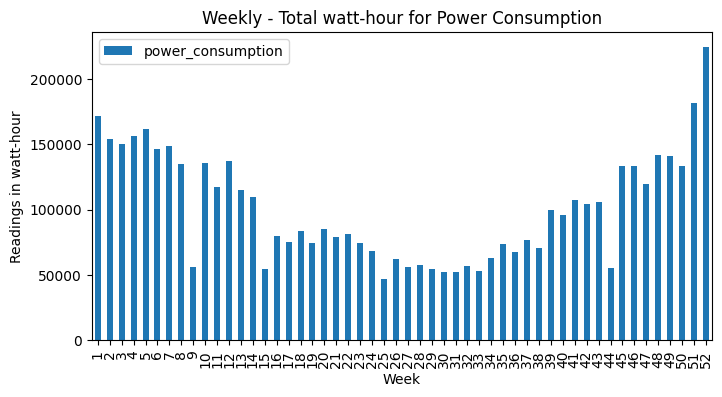

In [61]:
#Weekly - Total watt-hour for Power Consumption

df_power_consumption.groupby(df_power_consumption.index.isocalendar().week).sum().plot(kind="bar",xlabel='Week',ylabel='Readings in watt-hour',title="Weekly - Total watt-hour for Power Consumption", figsize=(8,4))

<Axes: title={'center': 'Weekly - Maximum watt-hour for Power Consumption'}, xlabel='Week', ylabel='Readings in watt-hour'>

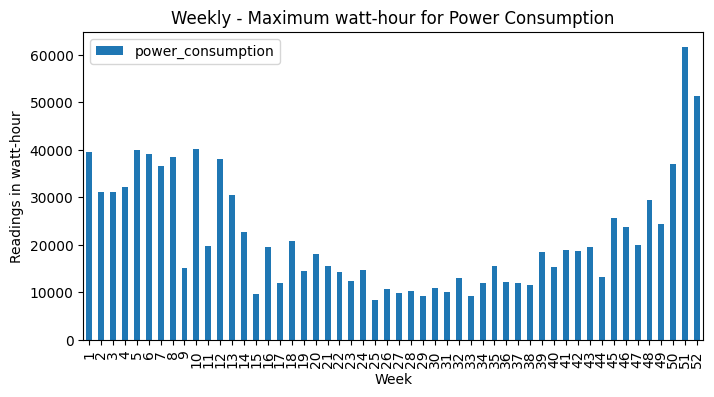

In [62]:
#Weekly - Maximum watt-hour for Power Consumption

df_power_consumption.groupby(df_power_consumption.index.isocalendar().week).max().plot(kind="bar",xlabel='Week',ylabel='Readings in watt-hour',title="Weekly - Maximum watt-hour for Power Consumption", figsize=(8,4))

<Axes: title={'center': 'Weekly - Minimum watt-hour for Power Consumption'}, xlabel='Week', ylabel='Readings in watt-hour'>

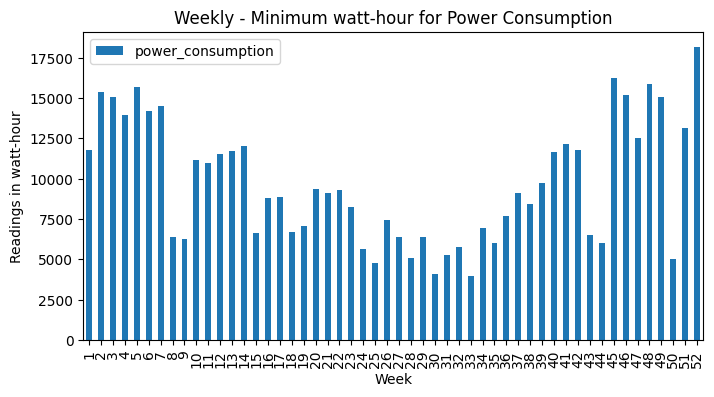

In [63]:
#Weekly - Minimum watt-hour for Power Consumption

df_power_consumption.groupby(df_power_consumption.index.isocalendar().week).min().plot(kind="bar",xlabel='Week',ylabel='Readings in watt-hour',title="Weekly - Minimum watt-hour for Power Consumption", figsize=(8,4))

<Axes: title={'center': 'Weekly - Average watt-hour for Power Consumption'}, xlabel='Week', ylabel='Readings in watt-hour'>

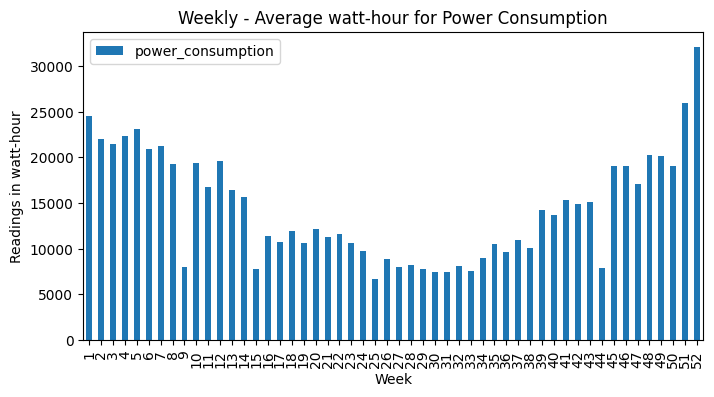

In [64]:
#Weekly - Average watt-hour for Power Consumption

df_power_consumption.groupby(df_power_consumption.index.isocalendar().week).mean().plot(kind="bar",xlabel='Week',ylabel='Readings in watt-hour',title="Weekly - Average watt-hour for Power Consumption", figsize=(8,4))

**Observation for Weekly Power Consumption(watt hour)**

Minumum power consumption is done in week 33 around ~ 4 KWH

Maximum power consumption is done in week 51 around ~ 60 KWH

Avearge power consumption ranges around ~ 7-30 KWH

### **Sub Metering Analysis**

<Axes: title={'center': 'Monthly - Total watt-hour for sub_meterings'}, xlabel='Month', ylabel='Readings in watt-hour'>

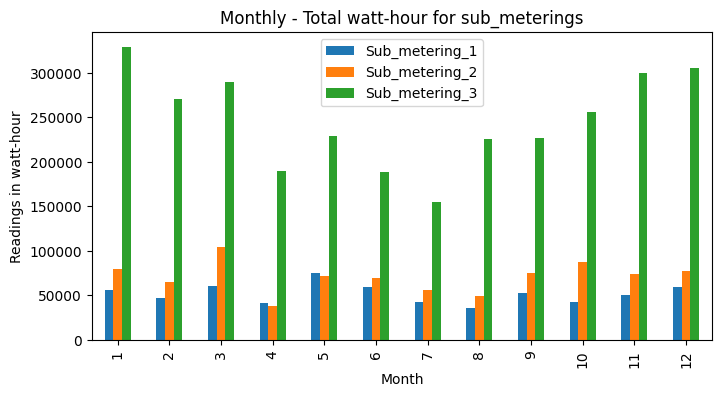

In [65]:
#Monthly - Total watt-hour for sub_meterings

df_sub_meterings.groupby(df_sub_meterings.index.month).sum().plot(kind="bar",xlabel='Month',ylabel='Readings in watt-hour',title="Monthly - Total watt-hour for sub_meterings",figsize=(8,4))

<Axes: title={'center': 'Monthly - Maximum watt-hour for sub_meterings'}, xlabel='Month', ylabel='Readings in watt-hour'>

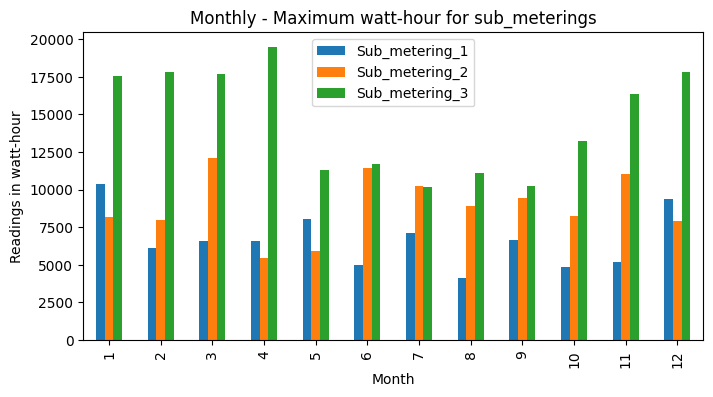

In [66]:
#Monthly - Maximum watt-hour for sub_meterings

df_sub_meterings.groupby(df_sub_meterings.index.month).max().plot(kind="bar",xlabel='Month',ylabel='Readings in watt-hour',title="Monthly - Maximum watt-hour for sub_meterings",figsize=(8,4))

<Axes: title={'center': 'Monthly - Minimum watt-hour for sub_meterings'}, xlabel='Month', ylabel='Readings in watt-hour'>

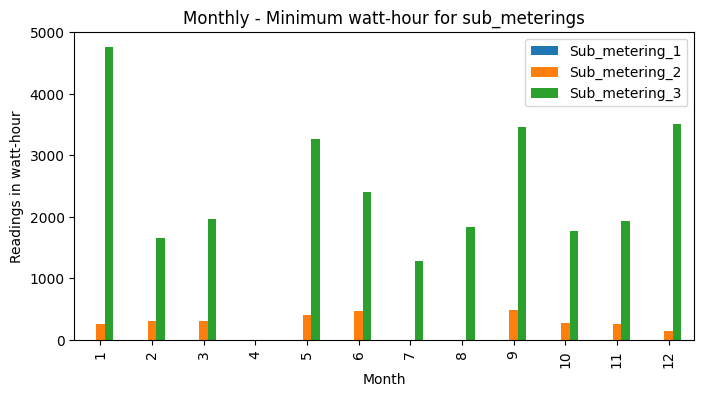

In [67]:
#Monthly - Minimum watt-hour for sub_meterings

df_sub_meterings.groupby(df_sub_meterings.index.month).min().plot(kind="bar",xlabel='Month',ylabel='Readings in watt-hour',title="Monthly - Minimum watt-hour for sub_meterings",figsize=(8,4))

<Axes: title={'center': 'Monthly - Average watt-hour for sub_meterings'}, xlabel='Month', ylabel='Readings in watt-hour'>

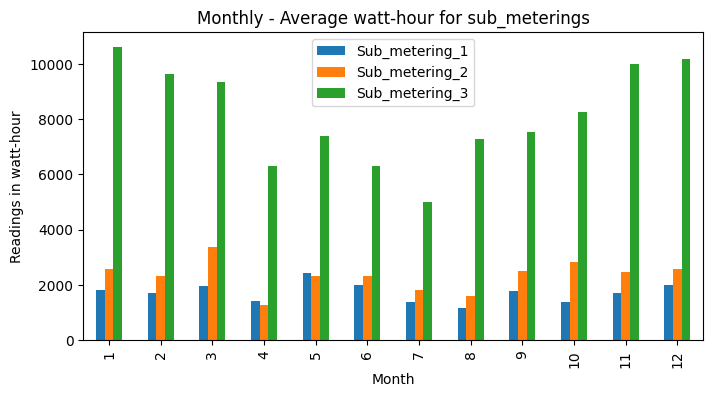

In [68]:
#Monthly - Average watt-hour for sub_meterings

df_sub_meterings.groupby(df_sub_meterings.index.month).mean().plot(kind="bar",xlabel='Month',ylabel='Readings in watt-hour',title="Monthly - Average watt-hour for sub_meterings",figsize=(8,4))

**Observation for Monthly Sub Meterings: 1,2,3(watt hour)**

Consumption of sub_metering 3 enerygy is comparatively low in July month

Sub_metering 1 and 2 consumes almost same amount of energy on average as compared to sub_metering 3

<Axes: title={'center': 'Weekly - Total watt-hour for sub-meterings'}, xlabel='Week', ylabel='Readings in watt-hour'>

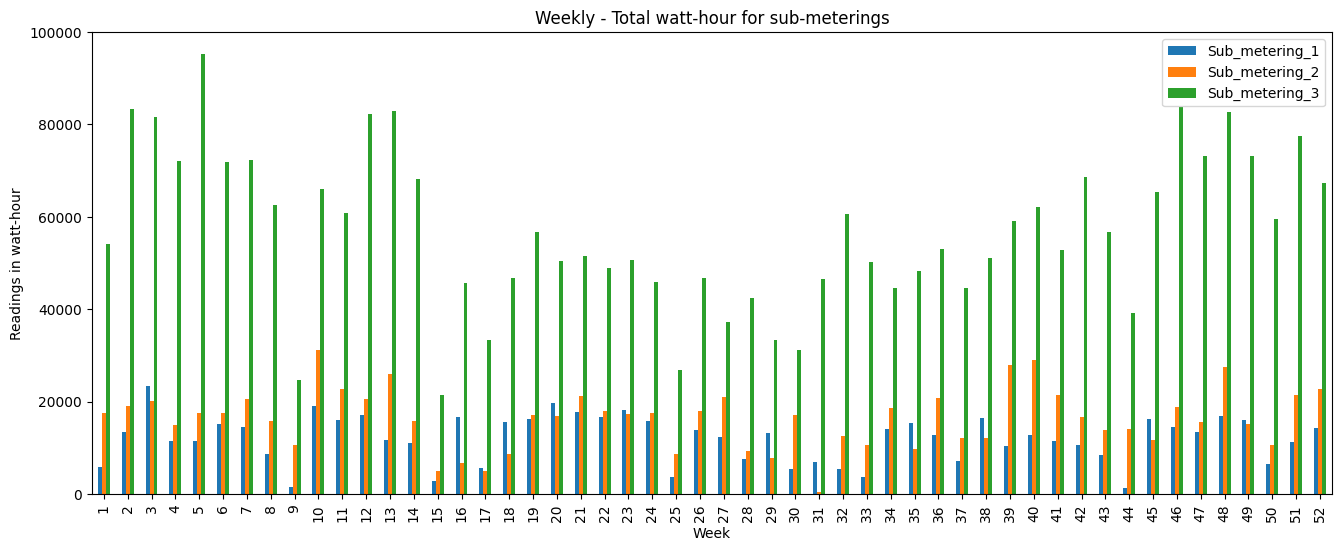

In [74]:
#Weekly - Total watt-hour for sub-meterings

df_sub_meterings.groupby(df_power_consumption.index.isocalendar().week).sum().plot(kind="bar",xlabel='Week',ylabel='Readings in watt-hour',figsize=(16,6),title="Weekly - Total watt-hour for sub-meterings")

<Axes: title={'center': 'Weekly - Maximum watt-hour for sub-meterings'}, xlabel='Week', ylabel='Readings in watt-hour'>

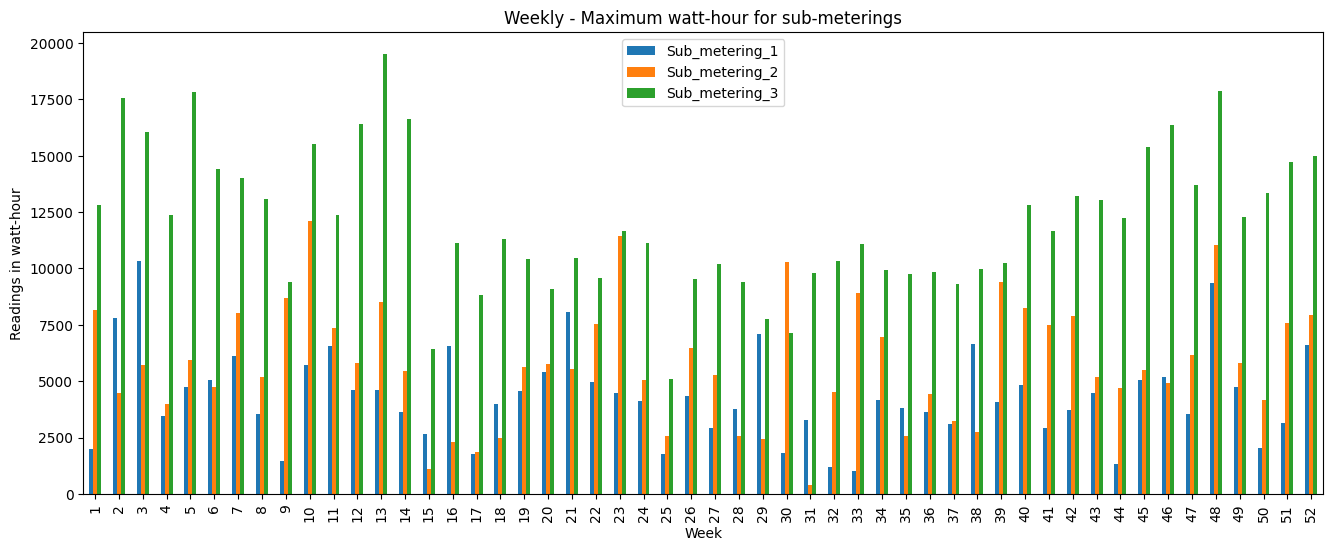

In [75]:
#Weekly - Maximum watt-hour for sub-meterings

df_sub_meterings.groupby(df_power_consumption.index.isocalendar().week).max().plot(kind="bar",xlabel='Week',ylabel='Readings in watt-hour',figsize=(16,6),title="Weekly - Maximum watt-hour for sub-meterings")

<Axes: title={'center': 'Weekly - Minimum watt-hour for sub-meterings'}, xlabel='Week', ylabel='Readings in watt-hour'>

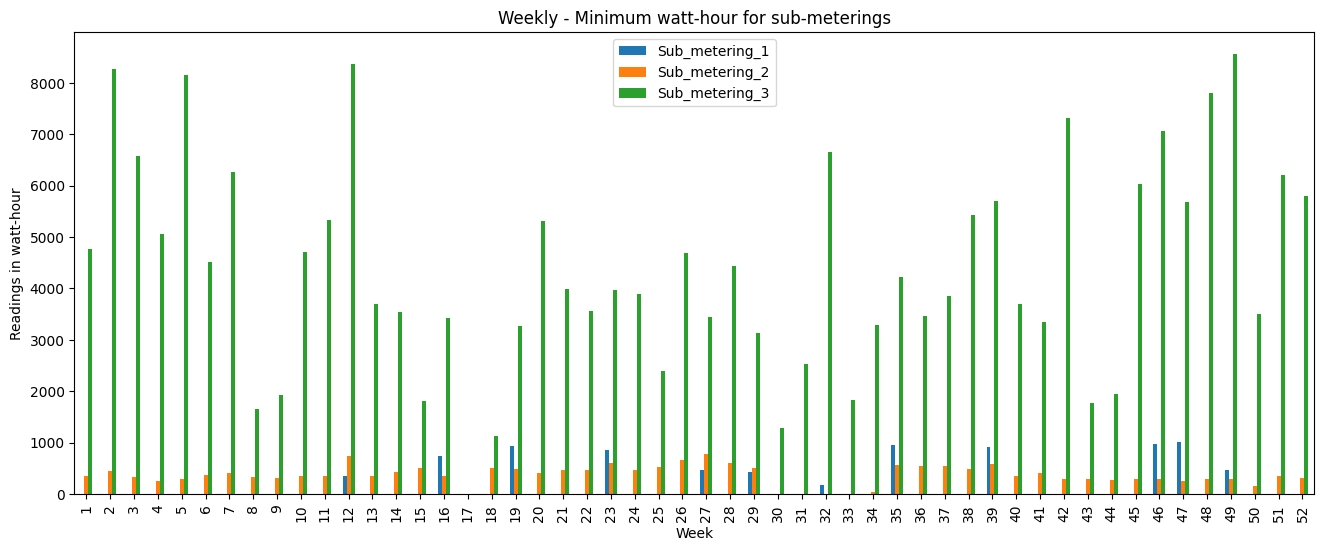

In [76]:
#Weekly - Minimum watt-hour for sub-meterings

df_sub_meterings.groupby(df_power_consumption.index.isocalendar().week).min().plot(kind="bar",xlabel='Week',ylabel='Readings in watt-hour',figsize=(16,6),title="Weekly - Minimum watt-hour for sub-meterings")

<Axes: title={'center': 'Weekly - Average watt-hour for sub-meterings'}, xlabel='Week', ylabel='Readings in watt-hour'>

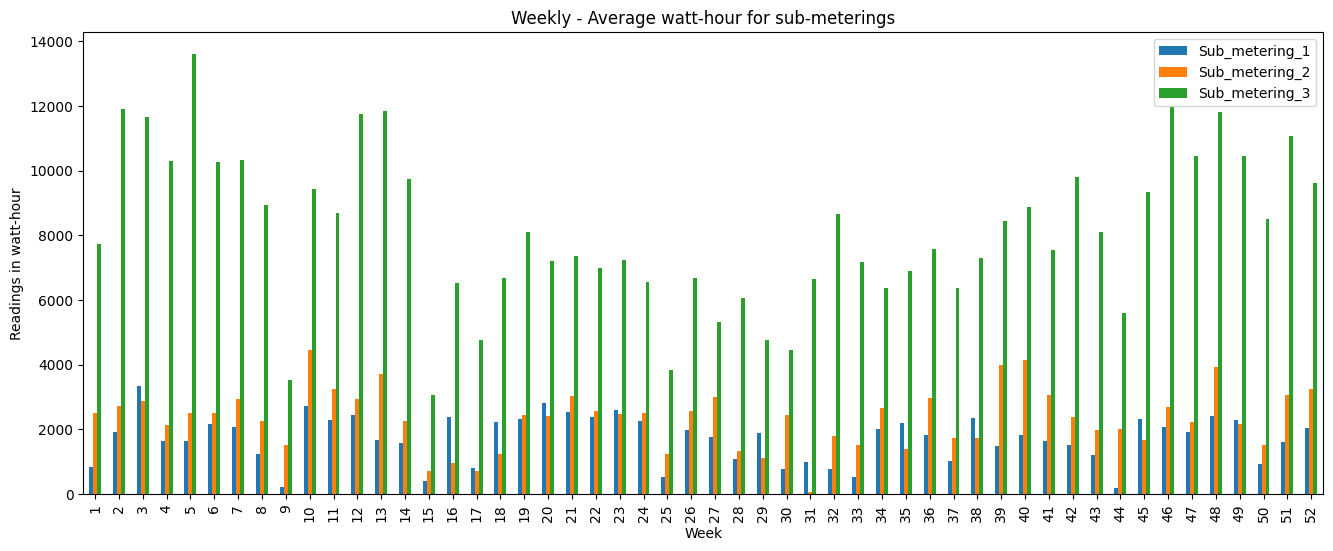

In [73]:
#Weekly - Average watt-hour for sub-meterings

df_sub_meterings.groupby(df_power_consumption.index.isocalendar().week).mean().plot(kind="bar",xlabel='Week',ylabel='Readings in watt-hour',figsize=(16,6),title="Weekly - Average watt-hour for sub-meterings")

## **Conclusion**

Based on the aggregate results gotten from our dataset, we can determine power consumption in the household in different categories(Monthly, Weekly, Sub Metering[1,2,3])